Оцените потенциальный экономический эффект, который вы ожидаете получить в случае успешной реализации проекта.
- Опишите логику оценки и приведите расчет;
- Как оценка эффекта будет меняться в зависимости от качества модели?
- Можете ли вы оценить, насколько изменится эффект от роста качества модели на 1%? На 10%?


In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Решение

Компании принесёт прибыль (в рамках этой программы-акции) продажа пакета услуг, который будет продан тем, кто прошёл тестирование. Для оценки экономического эффекта мы берем в расчет только инкрементальный денежный поток, согласно методологии оценки проектов от Chartered Institute of Management Accountants (CIMA). 

Постоянные расходы мы не учитываем в оценке экономического эффекта, т.к. они не являются инкрементальными. Расходы на обепечение прохождения теста(поддержка сервиса, продвижение и рекламу тестирования в Интернет) взял на себя отдел PR в рамках их проекта узнаваемости бренда сети клиник М., и они не являются инкрементальными для данного проекта.

Для рассчёта экономичекого эффекта используем следующие показатели:
- $N$ -  количество пациентов, прошедших тестирование, пациенты;
- $AMRU_{high}$(Average Margin per User) - средняя прибыль от 1 пользователя, который по тестированию имеет высокий риск к заболеванию, руб.;
- $AMRU_{low}$(Average Margin per User) - средняя прибыль от 1 пользователя, который по тестированию имеет низкий риск к заболеванию, руб.;
- $\eta$ - вероятность прихода в клинику людей, которым тестирование сообщило о высоком риске к заболеваниюб %;
- $\mu$ - вероятность прихода в клинику людей, которым тестирование сообщило о низком риске к заболеваниюб %;
- $Discount_{high}$ - скидка, предоставляемая пациентам, кому тестирование сообщило о высоком риске к заболеванию, %;
- $Discount_{low}$ - скидка, предоставляемая пациентам, кому тестирование сообщило о низком риске к заболеванию, %;
- $Price_{high}$ - цена за пакет услуг для пациентов, кому тестирование сообщило о высоком риске к заболеванию, руб.;
- $Price_{low}$ - цена за пакет услуг для пациентов, кому тестирование сообщило о низком риске к заболеванию, руб.;
- $Сost_{high}$ - переменные затраты пакета услуг для пациентов, кому тестирование сообщило о высоком риске к заболеванию, руб.;
- $Сost_{low}$ - переменные затраты пакета услуг для пациентов, кому тестирование сообщило о высоком риске к заболеванию, руб.;
- $w$ - доля больных диабетом людей в России;
- $\,TP,\, FP,\, TN,\,FN$ - взяты из матрицы ошибок:

***Логика оценки***






*Экономический эффект:*
* $N*[\eta*(\frac{TP*w}{TP+FP}+\frac{FN*(1-w)}{TN+FN})*AMPU_{high}+\mu*(\frac{FP*w}{TP+FP}+\frac{TN*(1-w)}{TN+FN})*AMPU_{low}]$, 

где:
* $AMPU_{high} = Price_{high}*(1-Discount_{high})-(Cost_{high})$,
* $AMPU_{low} = Price_{low}*(1-Discount_{high})-(Cost_{low})$.






Бизнес-кейс построили на следующих предположениях:

In [2]:
N = 1000
eta = 0.5
mu = 0.4
discount_high = 0.60
discount_low = 0.172
price_high = 9160
price_low = 2535
cost_high = 1820
cost_low = 320
w = 0.057

In [3]:
def economic_effect(TP,FP, FN, TN, N = N, eta = eta, mu = mu, discount_high = discount_high, discount_low = discount_low,
                    price_high = price_high, price_low = price_low, cost_high = cost_high, cost_low = cost_low,
                    w = w):#0.057
  AMPU_high = price_high*(1-discount_high)-cost_high
  AMPU_low = price_low*(1-discount_low)-cost_low
  profit_high = N*(eta*(TP*w/(TP+FP)+FN*(1-w)/(TN+FN))) * AMPU_high
  profit_low = N * (mu*(FP*w/(TP+FP)+TN*(1-w)/(TN+FN))) * AMPU_low
  calc = profit_high + profit_low
  return round(calc / 1000, 1)

def recall(TP,FP, FN, TN):
  return(TP/(TP+FN))

def precision(TP,FP, FN, TN):
  return(TP/(TP+FP))

def f_score(TP,FP, FN, TN):
  r = recall(TP,FP, FN, TN)
  p = precision(TP,FP, FN, TN)
  return(2*r*p/(r+p))

In [4]:
 print('Таким образом, от внедрения проекта мы ожидаем экономический эффект, равный', economic_effect(39,3,2,19), 'тыс.руб., при f1-score', round(f_score(39,3,2,19),2))
 print('Улучшение модели на 1% по расчетам принесет эффект, равный', economic_effect(40,3,1,19), 'тыс.руб., при f1-score', round(f_score(40,3,1,19),2))
 print('Идеальная модель по расчетам принесет эффект, равный', economic_effect(41,0,0,22), 'тыс.руб., при f1-score', round(f_score(41,0,0,22),2))

Таким образом, от внедрения проекта мы ожидаем экономический эффект, равный 741.6 тыс.руб., при f1-score 0.94
Улучшение модели на 1% по расчетам принесет эффект, равный 732.7 тыс.руб., при f1-score 0.95
Идеальная модель по расчетам принесет эффект, равный 723.6 тыс.руб., при f1-score 1.0


Построим график зависимости экономического эффекта от f1-score для проверки предложенного проекта на устойчивость в зависимости от качества модели при прочих равных - фиксированном значении  $FP + TN$.

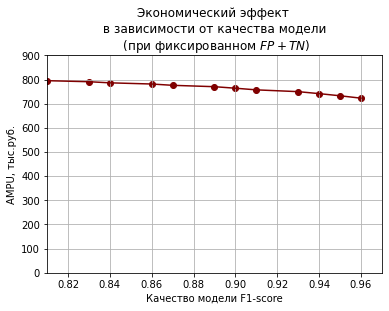

In [5]:
p = [ economic_effect(i,3,41-i,19) for i in range(30,42)]
f1 = [round(f_score(i,3,41-i,19),2) for i in range(30,42)]
p_ideal = economic_effect(41,0,0,22) # добавьте на график, плиз
f1_ideal = round(f_score(41,0,0,22),2) # добавьте на график, плиз


plt.plot(f1, p, c= "maroon")
plt.scatter(f1, p, c= "maroon")
plt.grid()
plt.title("Экономический эффект \n в зависимости от качества модели \n (при фиксированном $FP + TN$)")
plt.xlabel("Качество модели F1-score")
plt.ylabel("AMPU, тыс.руб.")
plt.xlim(0.81, 0.97)
plt.ylim(0, 900)
plt.show()

Предложенный проект отвечает финансовым критериям, прогнозируемый результат достаточно устойчив.
Проект рекомендуется к ведрению.